In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [18]:
# no clustering - err

# us_period0, us_period1, France, Germany
# CJS time 單位是 second (minute的話數字太大)

data_locs = ['us_period_0', 'us_period_1', 'France', 'Germany']

for data_loc in data_locs:
    print(f'\n{data_loc}')
    file_path = f'./{data_loc}/p2_est_result/n_cluster_0.txt'

    with open(file_path) as f:
        lines = f.readlines()

    for line in lines:
        print(line)
        
# United_Kingdom, Netherlands

data_locs = ['United_Kingdom', 'Netherlands']

for data_loc in data_locs:
    print(f'\n{data_loc}')
    for period in [0,1]:
        print(f'\nperiod_{period}')
        file_path = f'./{data_loc}/p2_est_result/period_{period}/n_cluster_0.txt'
        with open(file_path) as f:
            lines = f.readlines()
        for line in lines:
            print(line)


us_period_0
err: 0.05920709577136057

std: 0.013658727092350137

CJS time: 0.2541766

us_period_1
err: 0.00822124948220186

std: 0.007185083476627219

CJS time: 0.4174182

France
err: 0.061213735883563464

std: 0.06801055384327746

CJS time: 0.2982092

Germany
err: 0.611006669573091

std: 0.34217743701185344

CJS time: 0.9281113

United_Kingdom

period_0
err: 1.1424878236406306

std: 0.9403920420838539

CJS time: 0.2813156

period_1
err: 1.4441640455810638

std: 1.6711093580822138

CJS time: 0.4156117

Netherlands

period_0
err: 0.8882791156603812

std: 1.6169564952239477

CJS time: 0.3404138

period_1
err: 3.4236742619156657

std: 3.0600107374664014

CJS time: 0.6463702



us_period_1

n_cluster: 2
number of error rate > 1: 0
number of nan: 0

n_cluster: 3
number of error rate > 1: 0
number of nan: 0

n_cluster: 4
number of error rate > 1: 0
number of nan: 0

n_cluster: 5
number of error rate > 1: 0
number of nan: 0

n_cluster: 6
number of error rate > 1: 0
number of nan: 0

n_cluster: 7
number of error rate > 1: 0
number of nan: 0

n_cluster: 8
number of error rate > 1: 0
number of nan: 0


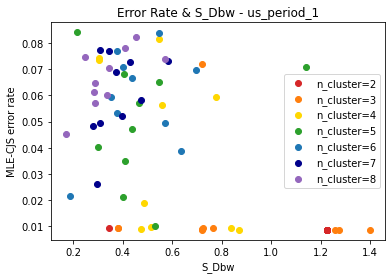

In [35]:
# data_locs = ['us_period_0', 'us_period_1', 'France', 'Germany']

loc_choose = 1
data_locs = ['us_period_0', 'us_period_1', 'France', 'Germany']
data_loc = data_locs[loc_choose]

print(f'\n{data_loc}')

# err > err_up_limit -> not write into record
err_up_limit = 1

err_record, std_record, time_record = [], [], []
for n_cluster in [2,3,4,5,6,7,8]:
    err_record.append([])
    std_record.append([])
    time_record.append([])
    for label in range(10):
        file_path = f'./{data_loc}/p2_est_result/n_cluster_{n_cluster}/label_{label}.txt'
        with open(file_path) as f:
            lines = f.readlines()
        time_record[-1].append(float(lines[-1][10:]))
        if float(lines[0][5:]) > err_up_limit:
            err_record[-1].append(None)
            std_record[-1].append(None)
        else:
            err_record[-1].append(float(lines[0][5:]))
            std_record[-1].append(float(lines[1][5:]))
            
        
# s_dbw_record
s_dbw_record = []
s_dbw_file_path = f'../Af_oral/{data_loc}/p0_cluster_result/s_dbw_record.csv'
df_sdbw = pd.read_csv(s_dbw_file_path)
df_sdbw.head()
for n_cluster in range(7): # n_cluster=2~8
    s_dbw_record.append([])
    for label in range(10):
        s_dbw_record[-1].append(df_sdbw['S_Dbw'][n_cluster*10+label])

# scatter plot - Error Rate & S_Dbw

plt.title(f'Error Rate & S_Dbw - {data_loc}')
plt.xlabel('S_Dbw')
plt.ylabel('MLE-CJS error rate')

colors = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'darkblue', 'tab:purple']

for n_cluster in range(7):
    _cluster = n_cluster+2
    plt.scatter(s_dbw_record[n_cluster], err_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    print(f'\nn_cluster: {_cluster}')
    num_over_err_up_limit = 0
    num_is_nan = 0
    for label in range(10):
        if err_record[n_cluster][label] is None:
            num_over_err_up_limit += 1
        elif np.isnan(err_record[n_cluster][label]):
            num_is_nan += 1
    print(f'number of error rate > {err_up_limit}: {num_over_err_up_limit}')
    print(f'number of nan: {num_is_nan}')
    
plt.legend()

In [36]:
# Correlation Matrix - n_cluster, S_Dbw, err, std
# Pearson correlation

print(f'err_up_limit: {err_up_limit}')
print(f'\n{data_loc}')
data_df = pd.DataFrame(columns = ['n_cluster', 'S_Dbw', 'err', 'std', 'CJS_time'], index=list(range(70)))

for n_cluster in [2,3,4,5,6,7,8]:
    for label in range(10):
        index = (n_cluster-2)*10+label
        data_df['n_cluster'][index] = n_cluster
        data_df['S_Dbw'][index] = s_dbw_record[n_cluster-2][label]
        data_df['err'][index] = err_record[n_cluster-2][label]
        data_df['std'][index] = std_record[n_cluster-2][label]
        data_df['CJS_time'][index] = time_record[n_cluster-2][label]
        if err_record[n_cluster-2][label] is None:
            print(f'err is None: n_cluster={n_cluster}, label={label}')
            data_df['err'][index] = 'None'
            data_df['std'][index] = 'None'
        elif np.isnan(err_record[n_cluster-2][label]):
            print(f'err is nan: n_cluster={n_cluster}, label={label}')
            data_df['err'][index] = 'None'
            data_df['std'][index] = 'None'
            
# Delete these row indexes from dataFrame
indexNames = data_df[ data_df['err'] == 'None' ].index
print(f'drop index: {indexNames}')
data_df.drop(indexNames , inplace=True)

data_df.head(20)
#print(data_df)
max_time = max(data_df['CJS_time'])
print(f'max CJS time: {max_time}')
data_df.astype('float64').corr()


err_up_limit: 1

us_period_1
drop index: Int64Index([], dtype='int64')
max CJS time: 13.5825


,n_cluster,S_Dbw,err,std,CJS_time
n_cluster,1.000000,-0.714362,0.719256,0.678271,0.970779
S_Dbw,-0.714362,1.000000,-0.571743,-0.544228,-0.620324
err,0.719256,-0.571743,1.000000,0.994282,0.666139
std,0.678271,-0.544228,0.994282,1.000000,0.623519
CJS_time,0.970779,-0.620324,0.666139,0.623519,1.000000


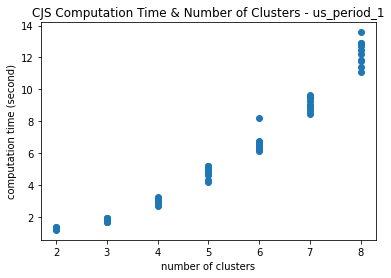

In [37]:
# the scatter plots x-axis: computation time, y-axis: estimation error rate.
plt.title(f'CJS Computation Time & Number of Clusters - {data_loc}')
plt.ylabel('computation time (second)')
plt.xlabel('number of clusters')

colors = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'darkblue', 'tab:purple']

'''
for n_cluster in range(7):
    _cluster = n_cluster+2
    n_cluster_index = data_df.index[data_df['n_cluster'] == _cluster]
    print(f'n_cluster_index: {n_cluster_index}')
    plt.scatter(data_df['n_cluster'][n_cluster_index], data_df['CJS_time'][n_cluster_index])#, color=colors[n_cluster], label=f'n_cluster={_cluster}')
    print(f'\nn_cluster: {_cluster}')
    num_over_err_up_limit = 0
    num_is_nan = 0
    for label in range(10):
        if err_record[n_cluster][label] is None:
            num_over_err_up_limit += 1
        elif np.isnan(err_record[n_cluster][label]):
            num_is_nan += 1
    print(f'number of error rate > {err_up_limit}: {num_over_err_up_limit}')
    print(f'number of nan: {num_is_nan}')
'''    
#plt.legend()
plt.scatter(data_df['n_cluster'], data_df['CJS_time'])

In [22]:
data_df.index[data_df['n_cluster'] == 2]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

err_up_limit: 1

us_period_1


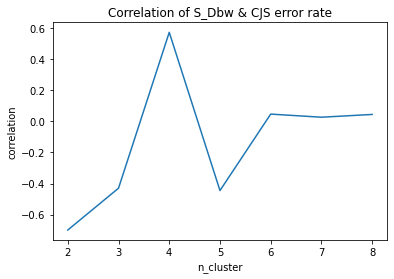

In [23]:
# check mean result
print(f'err_up_limit: {err_up_limit}')

print(f'\n{data_loc}')
#print(np.corrcoef(data_df['S_Dbw'][:10], data_df['err'][:10]))
'''
correlation_sdbw_err, n_clusters = [], []
for n_cluster in range(7):
    print(f'\nn_cluster: {n_cluster+2}')
    n_cluster_index = data_df[ data_df['n_cluster'] == n_cluster+2 ].index # because some index was drop (data_df['err'] == 'None')
    print(n_cluster_index)
    n_cluster_df = data_df['n_cluster'][n_cluster_index]
    #print(f'n_cluster:\n {n_cluster_df}')
    err = data_df['err'][n_cluster_index]
    #print(f'err:\n {err}')
    n_clusters.append(n_cluster+2)
    #print(f'corr:\n {corr}')
   '''
n_clusters = [2,3,4,5,6,7,8]
correlation_sdbw_err = [-0.699137,-0.430075,0.572882,-0.445110,0.046737,0.026629,0.044545]
plt.title('Correlation of S_Dbw & CJS error rate')
plt.xlabel('n_cluster')
plt.ylabel('correlation')
plt.plot(n_clusters, correlation_sdbw_err)

In [24]:
# correlation of S_dbw and error rate with different n_cluster
print(f'err_up_limit: {err_up_limit}')

print(f'\n{data_loc}')


for n_cluster in range(7):
    print(f'\nn_cluster: {n_cluster+2}')
    n_cluster_index = data_df[ data_df['n_cluster'] == n_cluster+2 ].index # because some index was drop (data_df['err'] == 'None')
    S_Dbw_mean = data_df['S_Dbw'][n_cluster_index].mean()
    err_mean = data_df['err'][n_cluster_index].mean()
    std_mean = data_df['std'][n_cluster_index].mean()
    time_mean = data_df['CJS_time'][n_cluster_index].mean()
    print(f'mean_S_Dbw: {S_Dbw_mean}')
    print(f'mean_err: {err_mean}')
    print(f'mean_std: {std_mean}')
    print(f'mean_CJS_time: {time_mean}')

err_up_limit: 1

us_period_1

n_cluster: 2
mean_S_Dbw: 1.137918638
mean_err: 0.008664496533269856
mean_std: 0.0063513253852626825
mean_CJS_time: 1.2888807000000002

n_cluster: 3
mean_S_Dbw: 0.8343267478999999
mean_err: 0.015256943172975473
mean_std: 0.018799020505820413
mean_CJS_time: 1.8297617999999995

n_cluster: 4
mean_S_Dbw: 0.5669136394000001
mean_err: 0.04005508718400168
mean_std: 0.07073899165847733
mean_CJS_time: 3.0006852

n_cluster: 5
mean_S_Dbw: 0.4849162875000001
mean_err: 0.04993088729212719
mean_std: 0.08637447623389007
mean_CJS_time: 4.8306518

n_cluster: 6
mean_S_Dbw: 0.4582827891
mean_err: 0.05905856721178608
mean_std: 0.10522806859324685
mean_CJS_time: 6.6746949

n_cluster: 7
mean_S_Dbw: 0.3792282018
mean_err: 0.06044446318221153
mean_std: 0.10675986081720794
mean_CJS_time: 9.1424129

n_cluster: 8
mean_S_Dbw: 0.33980851339999996
mean_err: 0.06680590097423458
mean_std: 0.11791430595614175
mean_CJS_time: 12.290588000000001


In [25]:
####################        分隔線            ####################################


Netherlands, period_1

n_cluster: 2
number of error rate > 100000000000000000000: 0
number of nan: 0

n_cluster: 3
number of error rate > 100000000000000000000: 2
number of nan: 0

n_cluster: 4
number of error rate > 100000000000000000000: 4
number of nan: 0

n_cluster: 5
number of error rate > 100000000000000000000: 3
number of nan: 0

n_cluster: 6
number of error rate > 100000000000000000000: 1
number of nan: 0

n_cluster: 7
number of error rate > 100000000000000000000: 0
number of nan: 0

n_cluster: 8
number of error rate > 100000000000000000000: 1
number of nan: 0


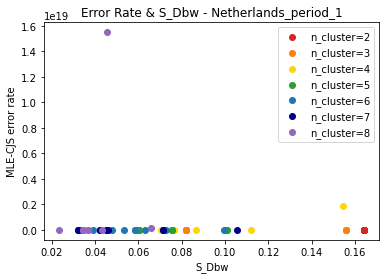

In [26]:
# data_locs = ['United_Kingdom', 'Netherlands']

loc_choose = 1
# period_choose = 0 or 1
period_choose = 1
data_locs = ['United_Kingdom', 'Netherlands']
data_loc = data_locs[loc_choose]

print(f'\n{data_loc}, period_{period_choose}')

err_up_limit = 10**20 # err > err_up_limit -> not write into record
        
err_record, std_record, time_record = [], [], []
for n_cluster in [2,3,4,5,6,7,8]:
    err_record.append([])
    std_record.append([])
    time_record.append([])
    for label in range(10):
        file_path = f'./{data_loc}/p2_est_result/period_{period_choose}/n_cluster_{n_cluster}/label_{label}.txt'
        with open(file_path) as f:
            lines = f.readlines()
        time_record[-1].append(float(lines[-1][10:]))
        if float(lines[0][5:]) > err_up_limit:
            err_record[-1].append(None)
            std_record[-1].append(None)
        else:
            err_record[-1].append(float(lines[0][5:]))
            std_record[-1].append(float(lines[1][5:]))

# s_dbw_record
s_dbw_record = []
s_dbw_file_path = f'../Af_oral/{data_loc}/p0_cluster_result/period_{period_choose}/s_dbw_record.csv'
df_sdbw = pd.read_csv(s_dbw_file_path)
df_sdbw.head()
for n_cluster in range(7): # n_cluster=2~8
    s_dbw_record.append([])
    for label in range(10):
        s_dbw_record[-1].append(df_sdbw['S_Dbw'][n_cluster*10+label])

# scatter plot - Error Rate & S_Dbw
plt.title(f'Error Rate & S_Dbw - {data_loc}_period_{period_choose}')
plt.xlabel('S_Dbw')
plt.ylabel('MLE-CJS error rate')

colors = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'darkblue', 'tab:purple']
for n_cluster in range(7):
    _cluster = n_cluster+2
    plt.scatter(s_dbw_record[n_cluster], err_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    print(f'\nn_cluster: {_cluster}')
    num_over_err_up_limit = 0
    num_is_nan = 0
    for label in range(10):
        if err_record[n_cluster][label] is None:
            num_over_err_up_limit += 1
        elif np.isnan(err_record[n_cluster][label]):
            num_is_nan += 1
    print(f'number of error rate > {err_up_limit}: {num_over_err_up_limit}')
    print(f'number of nan: {num_is_nan}') # not 'nan' in UK and 
plt.legend()

In [27]:
print(f'err_up_limit: {err_up_limit}')
print(f'\n{data_loc}, period_{period_choose}')

data_df = pd.DataFrame(columns = ['n_cluster', 'S_Dbw', 'err', 'std', 'CJS_time'], index=list(range(70)))

for n_cluster in [2,3,4,5,6,7,8]:
    for label in range(10):
        index = (n_cluster-2)*10+label
        data_df['n_cluster'][index] = n_cluster
        data_df['S_Dbw'][index] = s_dbw_record[n_cluster-2][label]
        data_df['err'][index] = err_record[n_cluster-2][label]
        data_df['std'][index] = std_record[n_cluster-2][label]
        data_df['CJS_time'][index] = time_record[n_cluster-2][label]
        if err_record[n_cluster-2][label] is None:
            print(f'err is None: n_cluster={n_cluster}, label={label}')
            data_df['err'][index] = 'None'
            data_df['std'][index] = 'None'
        elif np.isnan(err_record[n_cluster-2][label]):
            print(f'err is nan: n_cluster={n_cluster}, label={label}')
            data_df['err'][index] = 'None'
            data_df['std'][index] = 'None'

# Delete these row indexes from dataFrame
indexNames = data_df[ data_df['err'] == 'None' ].index
print(f'drop index: {indexNames}')
data_df.drop(indexNames , inplace=True)
data_df.corr()
data_df.head(20)


err_up_limit: 100000000000000000000

Netherlands, period_1
err is None: n_cluster=3, label=1
err is None: n_cluster=3, label=7
err is None: n_cluster=4, label=2
err is None: n_cluster=4, label=5
err is None: n_cluster=4, label=6
err is None: n_cluster=4, label=8
err is None: n_cluster=5, label=1
err is None: n_cluster=5, label=2
err is None: n_cluster=5, label=5
err is None: n_cluster=6, label=9
err is None: n_cluster=8, label=1
drop index: Int64Index([11, 17, 22, 25, 26, 28, 31, 32, 35, 49, 61], dtype='int64')


,n_cluster,S_Dbw,err,std,CJS_time
0,2,0.164112,8.172464,12.874252,1.293802
1,2,0.164112,8.172464,12.874252,1.303601
2,2,0.164112,8.172464,12.874252,1.282151
3,2,0.164112,6.423648,10.277547,1.508246
4,2,0.164112,6.423648,10.277547,1.567157
5,2,0.164112,6.423648,10.277547,1.494919
6,2,0.164112,6.423648,10.277547,1.490772
7,2,0.164112,8.172464,12.874252,1.33266
8,2,0.164112,6.423648,10.277547,1.503461
9,2,0.164112,6.423648,10.277547,1.499478


In [28]:
# check mean result
print(f'err_up_limit: {err_up_limit}')
print(f'\n{data_loc}, period_choose: {period_choose}')

# Delete these row indexes from dataFrame
indexNames = data_df[ data_df['err'] == 'inf' ].index
print(f'drop index: {indexNames}')
data_df.drop(indexNames , inplace=True)
    
for n_cluster in range(7):
    print(f'\nn_cluster: {n_cluster+2}')
    n_cluster_index = data_df[ data_df['n_cluster'] == n_cluster+2 ].index # because some index was drop (data_df['err'] == 'None')
    #err = data_df['err'][n_cluster_index]
    #print(f'err: \n{err}')
    S_Dbw_mean = data_df['S_Dbw'][n_cluster_index].mean()
    err_mean = data_df['err'][n_cluster_index].mean()
    std_mean = data_df['std'][n_cluster_index].mean()
    time_mean = data_df['CJS_time'][n_cluster_index].mean()
    print(f'mean_S_Dbw: {S_Dbw_mean}')
    print(f'mean_err: {err_mean}')
    print(f'mean_std: {std_mean}')
    print(f'mean_CJS_time: {time_mean}')

err_up_limit: 100000000000000000000

Netherlands, period_choose: 1
drop index: Int64Index([], dtype='int64')

n_cluster: 2
mean_S_Dbw: 0.1641118238298613
mean_err: 7.123174034459962
mean_std: 11.316229374268875
mean_CJS_time: 1.4276247

n_cluster: 3
mean_S_Dbw: 0.10972039588281747
mean_err: 1499468769423.6274
mean_std: 3068362624456.595
mean_CJS_time: 3.6109218750000003

n_cluster: 4
mean_S_Dbw: 0.09607770498222411
mean_err: 3.09197033638233e+17
mean_std: 8.998745494302776e+17
mean_CJS_time: 6.692691833333334

n_cluster: 5
mean_S_Dbw: 0.07619029942976471
mean_err: 6857906517944.803
mean_std: 18558283702819.37
mean_CJS_time: 10.810932428571428

n_cluster: 6
mean_S_Dbw: 0.05836307361811288
mean_err: 37506332158444.31
mean_std: 97190207254737.5
mean_CJS_time: 17.29409111111111

n_cluster: 7
mean_S_Dbw: 0.052884283105592456
mean_err: 763796452977585.0
mean_std: 2015786084372827.5
mean_CJS_time: 24.757927000000002

n_cluster: 8
mean_S_Dbw: 0.03931473127441356
mean_err: 1.7362893610722353e+1